## scikit-learn can do **THAT**?!

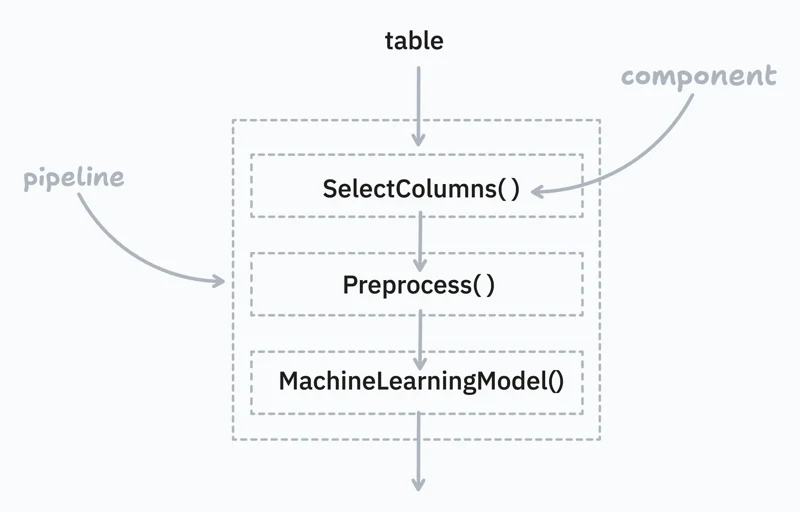

Time to run a fun little benchmark.

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("data/full_dataset/goemotions_1.csv")
df[['text', 'surprise']].sample(3)

,text,surprise
16440,Could be tripping or having an orgasm from dry...,0
57326,Props to the guy for being honest,0
6349,Sloths are cute! Especially when they’re cover...,0


In [7]:
X = df['text']
y = df['surprise']

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


pipe = make_pipeline(
    TfidfVectorizer(),
    TruncatedSVD(n_components=10),
    LogisticRegression(C=0.1),
    memory="cache_demo"
)

In [9]:
import numpy as np
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    pipe, 
    param_grid={
        "logisticregression__C": np.logspace(0.01, 2, 5), 
        "truncatedsvd__n_components": [10, 20, 50, 100]
    },
    cv=5,
    refit=False,
    n_jobs=-1
)

In [10]:
%%time 

grid.fit(X, y)

CPU times: user 1.96 s, sys: 269 ms, total: 2.23 s
Wall time: 1min 7s


GridSearchCV(cv=5,
             estimator=Pipeline(memory='cache_demo',
                                steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('truncatedsvd',
                                        TruncatedSVD(n_components=10)),
                                       ('logisticregression',
                                        LogisticRegression(C=0.1))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([  1.02329299,   3.21736253,  10.11579454,  31.80533688,
       100.        ]),
                         'truncatedsvd__n_components': [10, 20, 50, 100]},
             refit=False)

In [12]:
%%time 

grid.fit(X, y)

CPU times: user 1.88 s, sys: 182 ms, total: 2.06 s
Wall time: 43.9 s


GridSearchCV(cv=5,
             estimator=Pipeline(memory='cache_demo',
                                steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('truncatedsvd',
                                        TruncatedSVD(n_components=10)),
                                       ('logisticregression',
                                        LogisticRegression(C=0.1))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([  1.02329299,   3.21736253,  10.11579454,  31.80533688,
       100.        ]),
                         'truncatedsvd__n_components': [10, 20, 50, 100]},
             refit=False)

This technique was very visible, but there is a lot of invisible stuff under the hood too.

In [ ]:
pipe = make_pipeline(
    TfidfVectorizer(),
    TruncatedSVD(n_components=10),
    LogisticRegression(C=0.1),
    memory="emb_cache"
)